In [ ]:
#MATPLOTLIB SLIDER TUTORIAL
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Initial x and y arrays
x = np.linspace(0, 10, 30)
y = np.sin(0.5*x)*np.sin(x*np.random.randn(30))

# Spline interpolation
spline = UnivariateSpline(x, y, s = 6)
x_spline = np.linspace(0, 10, 1000)
y_spline = spline(x_spline)

# Plotting
fig = plt.figure()
plt.subplots_adjust(bottom=0.25)
ax = fig.subplots()
p = ax.plot(x,y)
p, = ax.plot(x_spline, y_spline, 'g')

# Defining the Slider button
# xposition, yposition, width and height
ax_slide = plt.axes([0.25, 0.1, 0.65, 0.03])

# Properties of the slider
s_factor = Slider(ax_slide, 'Smoothing factor',
                  0.1, 6, valinit=6, valstep=0.2)

# Updating the plot
def update(val):
    current_v = s_factor.val
    spline = UnivariateSpline(x, y, s = current_v)
    p.set_ydata(spline(x_spline))
    #redrawing the figure
    fig.canvas.draw()
    
# Calling the function "update" when the value of the slider is changed
s_factor.on_changed(update)
plt.show()

In [ ]:
#Example of heatmap animation

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
%matplotlib ipympl

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
dimension = (5, 5)
data = np.random.rand(dimension[0], dimension[1])
sns.heatmap(data, vmax=.8)

def init():
    sns.heatmap(np.zeros(dimension), vmax=.8, cbar=False)

def animate(i):
    data = np.random.rand(dimension[0], dimension[1])
    sns.heatmap(data, vmax=.8, cbar=False)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=20, repeat=False)
#line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line,redDots), interval=10, blit=False)

plt.show()

In [ ]:
#---------------------------------------------------------Heatmap with Slider---------------------------------------------------------------------#
# GET SOME MATPLOTLIB OBJECTS
# fig, ax = plt.subplots(figsize=(12, 8))
# plt.subplots_adjust(bottom=0.25)
# #line = ax.plot(dataSet[0], dataSet[1], lw=2, c='g')[0] # For line plot
 
# # AXES PROPERTIES
# plt.title("RSSI Heatmap", fontsize = 16)
# plt.ylabel("Node ID", fontsize = 16)
# plt.xlabel("Strip ID", fontsize = 16)

# #DISPLAY INITIAL IMAGE
# #im_ax = sns.heatmap(rssi_mat[numDataPoints-1], annot=True, cbar_kws={'label': 'RSSI'}, cmap="YlGnBu")
# im_h = ax.imshow(rssi_mat[numDataPoints-1], cmap="YlGnBu")
# #cbar = fig.colorbar(im_h, ax=ax)
# cbar = plt.colorbar(im_h)
# cbar.set_label(label='RSSI (dBm)', size=16)
# cbar.ax.tick_params(labelsize=12) 


# # Defining the Slider button
# # xposition, yposition, width and height
# ax_slide = plt.axes([0.15, 0.15, 0.55, 0.03])

# # Properties of the slider
# timestamp = Slider(ax_slide, 'Timestamp (ms)',
#                   t.min(), t.max(), valinit=t.min(), valstep=delta_t)
 
# def find_nearest(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx

# def update(val):
#     pos = timestamp.val
#     index = find_nearest(dataSet[3], pos)
#     im_h.set_data(rssi_mat[index])
    
# # Calling the function "update" when the value of the slider is changed
# timestamp.on_changed(update)
#plt.show()

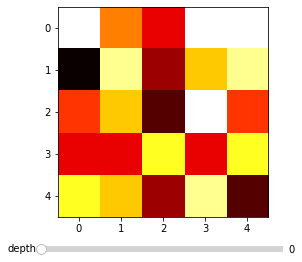

In [1]:
#HEATMAP WITH SLIDER
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider


#---------------------------------------------------------Animation Heatmap-----------------------------------------------------------------------#
def init():
    ax = sns.heatmap(rssi_mat, annot=True, cbar_kws={'label': 'RSSI'}, cmap="YlGnBu")
    ax.figure.axes[-1].yaxis.label.set_size(16)
    plt.title("RSSI Heatmap", fontsize = 16)
    plt.ylabel("Node ID", fontsize = 16)
    plt.xlabel("Strip ID", fontsize = 16)

#def append_array()

def animate(num, rssi_mat, dataSet):
    #global rssi_mat, dataSet
    #rssi_mat[int(df_sf_final.loc[num,'node_id']) - 1][int(df_sf_final.loc[num,'strip_id']) - 1] = df_sf_final.loc[num,'rssi']
    rssi_mat[int(dataSet[1][num])-1][int(dataSet[0][num])-1] = (dataSet[2][num]) 
    #print(rssi_mat[int(dataSet[1][num])-1][int(dataSet[0][num])-1])
    #print(rssi_mat)
    #sns.heatmap(rssi_mat, cbar=False, cmap="YlGnBu")
    ax = sns.heatmap(rssi_mat, annot=True, cbar=False, cmap="YlGnBu")
    ax.figure.axes[-1].yaxis.label.set_size(16)
    plt.title("RSSI Heatmap", fontsize = 16)
    plt.ylabel("Node ID", fontsize = 16)
    plt.xlabel("Strip ID", fontsize = 16)
    plt.tight_layout()
    
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=numDataPoints, fargs=(rssi_mat, dataSet), interval=0.5, repeat=False, blit=False)
plt.show()
#------------------------------------------------------------------------------------------------------------------------------------------------#
    

# generate a five layer data 
# data = np.random.randint(10, size=(5, 5, 5))
# # current layer index start with the first layer 
# #print(data)
# idx = 0

# # figure axis setup 
# fig, ax = plt.subplots()
# fig.subplots_adjust(bottom=0.15)

# # display initial image 
# im_h = ax.imshow(data[:, :, idx], cmap='hot', interpolation='nearest')

# # setup a slider axis and the Slider
# ax_depth = plt.axes([0.23, 0.02, 0.56, 0.04])
# slider_depth = Slider(ax_depth, 'depth', 0, data.shape[2]-1, valinit=idx)

# # update the figure with a change on the slider 
# def update_depth(val):
#     idx = int(round(slider_depth.val))
#     im_h.set_data(data[:, :, idx])

# slider_depth.on_changed(update_depth)

# plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib ipympl
from mpl_toolkits.mplot3d import Axes3D
 
# References
# https://gist.github.com/neale/e32b1f16a43bfdc0608f45a504df5a84
# https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
# https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation
 
# ANIMATION FUNCTION
def func(num, dataSet, line, redDots):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    redDots.set_data(dataSet[0:2, :num])    
    redDots.set_3d_properties(dataSet[2, :num]) 
    return line
 
 
# THE DATA POINTS
t = np.arange(0,20,0.2) # This would be the z-axis ('t' means time here)
x = np.cos(t)-1
y = 1/2*(np.cos(2*t)-1)
dataSet = np.array([x, y, t])
print(dataSet)
numDataPoints = len(t)
 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
redDots = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='r', marker='o')[0] # For scatter plot
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('time')
ax.set_title('Trajectory of electron for E vector along [120]')
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line,redDots), interval=50, blit=False)
# line_ani.save(r'Animation.mp4')
 
 
plt.show()

In [ ]:
# #Heatmap animation over the time
# import matplotlib.animation as animation
# %matplotlib ipympl
# from matplotlib.widgets import Slider, Button, RadioButtons

# #DEFINE DATASET ARRAY
# x_sf = df_sf_final['strip_id'].to_numpy()
# y_sf = df_sf_final['node_id'].to_numpy()
# z_sf = df_sf_final['rssi'].to_numpy()
# t_sf = df_sf_final['timestamp'].to_numpy()
# dataSet_sf = np.array([x_sf, y_sf, z_sf, t_sf])
# numDataPoints_sf = len(t_sf)
# num_of_nodes = 15
# num_of_strips = 23


# #CREATE 3D ARRAY FOR HEATMAP
# rssi_mat = np.empty((numDataPoints_sf,15,23))
# fig = plt.figure(figsize=(15, 9))

# for index in range(numDataPoints_sf):
#     for node in range(num_of_nodes):
#         for strip in range(num_of_strips):
#             if node == int(dataSet_sf[1][index])-1 and strip == int(dataSet_sf[0][index])-1:
#                 rssi_mat[index][int(dataSet_sf[1][index])-1][int(dataSet_sf[0][index])-1] = (dataSet_sf[2][index])
#             else:
#                 rssi_mat[index][node][strip] = rssi_mat[index-1][node][strip]

# #print("dataset sf old:", dataSet_sf.shape)
# #test = np.delete(dataSet_sf, 0, axis=1)
# num_del_index = 0

# #--------------------------------------uncomment to filter the timestamp---------------------------------------------#

# #DATA CLEANING/FILTERING THE DATA THAT BELOW CERTAIN TIMESTAMPS
# for index in range(numDataPoints_sf-1):
#     if dataSet_sf[3][index] < 1660728942.00:
#        num_del_index += 1
#     # elif dataSet_sf[3][index] > 1659533598.97:
#     #     num_del_last_index  += 1


# print("old t_sf:", t_sf, t_sf.shape, "rssi old: ", rssi_mat.shape)

# dataSet_sf = np.delete(dataSet_sf, np.s_[0:num_del_index], axis=1)
# rssi_mat = np.delete(rssi_mat, np.s_[0:num_del_index], axis=0)
# x_sf = np.delete(x_sf, np.s_[0:num_del_index])
# y_sf = np.delete(y_sf, np.s_[0:num_del_index])
# z_sf = np.delete(z_sf, np.s_[0:num_del_index])
# t_sf = np.delete(t_sf, np.s_[0:num_del_index])


# numDataPoints_sf = dataSet_sf.shape[1]
# # print("dataset sf:",dataSet_sf.shape, "rssi new: ", rssi_mat.shape)
# # print(dataSet_sf)

# delta_t_sf = round((t_sf.max()-t_sf.min())/numDataPoints_sf, 6)

# #print("new t_sf:", t_sf, t_sf.shape, "x_sf:", x_sf.shape, "y_sf:", y_sf.shape, "z_sf:", z_sf.shape)

# #-------------------------------------------------------------------------------------------------------------------#

# #---------------------------------------------------------Animation Heatmap-----------------------------------------------------------------------#
# def init():
#     ax1 = fig.add_subplot(211) #(row, column, pos)
#     #ax1.set_autoscale_on
#     ax1.set_xlabel('Strip ID')
#     ax1.set_ylabel('Node ID')
#     ax1.set_title('RSSI Heatmap')

#     # ax = sns.heatmap(rssi_mat, annot=True, cbar_kws={'label': 'RSSI'}, cmap="YlGnBu")
#     # ax.figure.axes[-1].yaxis.label.set_size(16)
#     # plt.title("RSSI Heatmap", fontsize = 16)
#     # plt.ylabel("Node ID", fontsize = 16)
#     # plt.xlabel("Strip ID", fontsize = 16)


# def animate(num, rssi_mat, dataSet):
#     im_h.set_data(rssi_mat[num]) 
#     #global rssi_mat, dataSet
#     #rssi_mat[int(df_sf_final.loc[num,'node_id']) - 1][int(df_sf_final.loc[num,'strip_id']) - 1] = df_sf_final.loc[num,'rssi']
#     #rssi_mat[int(dataSet[1][num])-1][int(dataSet[0][num])-1] = (dataSet[2][num]) 
#     # ax = sns.heatmap(rssi_mat, annot=True, cbar=False, cmap="YlGnBu")
#     # ax.figure.axes[-1].yaxis.label.set_size(16)
#     # plt.title("RSSI Heatmap", fontsize = 16)
#     # plt.ylabel("Node ID", fontsize = 16)
#     # plt.xlabel("Strip ID", fontsize = 16)
#     # plt.tight_layout()

# # def update_heatmap(val):
# #     pos = timestamp_rssi.val
# #     index = find_nearest(dataSet_sf[3], pos)
# #     im_h.set_data(rssi_mat[index])    
    
# ax1 = fig.add_subplot(111) #(row, column, pos)
# ax1.set_xlabel('Strip ID')
# ax1.set_ylabel('Node ID')
# ax1.set_title('RSSI Heatmap')

# im_h = ax1.imshow(rssi_mat[numDataPoints_sf-1], cmap="YlGnBu")
# cbar = plt.colorbar(im_h, ax=ax1)
# cbar.set_label(label='RSSI (dBm)', size=16)
# cbar.ax.tick_params(labelsize=12) 

# anim = animation.FuncAnimation(fig, animate, frames=numDataPoints_sf, fargs=(rssi_mat, dataSet_sf), interval=2, repeat=False, blit=False)
# plt.show()


In [ ]:
# #3D PLot Animation
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# %matplotlib ipympl
# from mpl_toolkits.mplot3d import Axes3D
 

# # ANIMATION FUNCTION
# def func(num, dataSet, line, redDots):
#     # NOTE: there is no .set_data() for 3 dim data...
#     line.set_data(dataSet[0:2, :num])    
#     line.set_3d_properties(dataSet[2, :num])    
#     redDots.set_data(dataSet[0:2, :num])    
#     redDots.set_3d_properties(dataSet[2, :num]) 
#     return line
 
 
# # THE DATA POINTS

# t = df_vicon_final['time'].to_numpy()
# x = df_vicon_final['X'].to_numpy()
# y = df_vicon_final['Y'].to_numpy()
# dataSet = np.array([x, y, t])
# numDataPoints = len(t)
 
# # GET SOME MATPLOTLIB OBJECTS
# fig = plt.figure(figsize=(15, 10))
# ax = Axes3D(fig)
# redDots = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='r', marker='o')[0] # For scatter plot
# # NOTE: Can't pass empty arrays into 3d version of plot()
# line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
 
# # AXES PROPERTIES]
# # ax.set_xlim3d([limit0, limit1])
# ax.set_xlabel('X(t)')
# ax.set_ylabel('Y(t)')
# ax.set_zlabel('time')
# ax.set_title('Trajectory of robot')
 
# # Creating the Animation object
# line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line,redDots), interval=1, blit=False)
# #line_ani.save(r'Animation.mp4')
 
 
# plt.show()

In [ ]:
# #VICON PLOT WITH SLIDER
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# %matplotlib ipympl
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.widgets import Slider, Button, RadioButtons
 
# # THE DATA POINTS
# t = df_vicon_final['time'].to_numpy()
# x = df_vicon_final['X'].to_numpy()
# y = df_vicon_final['Y'].to_numpy()
# dataSet = np.array([x, y, t])
# numDataPoints = len(t)
# delta_t = round((t.max()-t.min())/numDataPoints, 6)

# # GET SOME MATPLOTLIB OBJECTS
# fig, ax = plt.subplots(figsize=(12, 8))
# plt.subplots_adjust(bottom=0.25)
# line = ax.plot(dataSet[0], dataSet[1], lw=2, c='g')[0] # For line plot

 
# # AXES PROPERTIES]
# ax.set_xlim(-11.185, 10.185)
# ax.set_ylim(-6.425, 7.575)
# ax.set_xlabel('X(t)')
# ax.set_ylabel('Y(t)')
# #ax.set_zlabel('time')
# ax.set_title('Trajectory of robot')

# # Defining the Slider button
# # xposition, yposition, width and height
# ax_slide = plt.axes([0.25, 0.15, 0.55, 0.03])

# # Properties of the slider
# timestamp = Slider(ax_slide, 'Timestamp (ms)',
#                   t.min(), t.max(), valinit=t.min(), valstep=delta_t)
 
# def find_nearest(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx

# def update(val):
#     pos = timestamp.val
#     index = find_nearest(dataSet[2], pos)
#     line.set_xdata(dataSet[0, :index])
#     line.set_ydata(dataSet[1, :index])

#     #redrawing the figure
#     fig.canvas.draw()
    
# # Calling the function "update" when the value of the slider is changed
# timestamp.on_changed(update)
# plt.show()

In [ ]:
# #2nd option but slower
# df_sf_buf = df_sf.explode('data')
# df_sf_proc = pd.json_normalize(json.loads(df_sf_buf.to_json(orient="records")))
# df_sf_proc.rename(columns={'data.r':'rssi','data.m':'magnetometer'}, inplace=True)

# df_sf_proc[['mx','my','mz']] = pd.DataFrame(df_sf_proc.magnetometer.to_list(), index = df_sf_proc.index)
# df_sf_proc['rssi'] = df_sf_proc['rssi'].str.get(0)
# df_sf_proc = df_sf_proc.drop(columns=['magnetometer'])
# df_sf_proc[['strip_id', 'node_id']] = df_sf_proc[['strip_id', 'node_id']].astype(int)
# df_sf_proc.to_csv('out_2.csv')
# df_sf_proc

In [ ]:
# df_sf_final = df_sf_buf.copy()
# #df_sf_final = df_sf_final.groupby(df_sf_final.index // 19).mean()
# df_sf_final = df_sf_final.groupby(df_sf_final.index // 19)['rssi','mx','my','mz'].mean()
# #df_sf_final[['strip_id','node_id','column_num','ID']] = df_sf_final[['strip_id','node_id','column_num','ID']].round(0)
# df_sf_final.to_csv('out_3_test.csv')
# df_sf_final

In [ ]:
# #df_test = test2.groupby(test2.index // 19).mean()
# #df_test[f'r_avg'] = df_test.shift(-1).rolling(4,4).mean()
# df_test = test2.copy()
# #df_test = pd.DataFrame(np.einsum('ijk->ik',df_test.values.reshape(-1,9,df_test.shape[1]))/19.0)
# df_test = df_test.groupby(df_test.index // 19).mean()
# df_test[['strip_id','node_id','column_num','ID']] = df_test[['strip_id','node_id','column_num','ID']].round(0)
# #df_test['timestamp'] = pd.to_datetime(df_test['timestamp'],unit='s')
# df_test.to_csv('out2.csv')
# df_test